<h1>COVID-19: CONFIRMED, DEATHS AND RECOVERED GLOBAL CASES</h1>

<p>The objective of this study is analyse the Covid-19 confirmed cases, deaths and recovered people around the world comparing with Brazil</p>

# SETUP

<p> Importing the libraries that we'll use</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date,timedelta

<p> Importing the database</p>
<p> I'm using datas from CSSEGIS in GitHub</p>

In [2]:
confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recovered = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

<p> Getting yesterday date</p>

In [3]:
yesterday = date.today() - timedelta(days=1)
day = yesterday.strftime("%m/%d/%Y")
day 

'07/24/2021'

# TREATMENT AND ANALYSIS OF CONFIRMED CASES DATABASE

In [4]:
confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/15/21,7/16/21,7/17/21,7/18/21,7/19/21,7/20/21,7/21/21,7/22/21,7/23/21,7/24/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,137853,137853,137853,137853,141489,142414,142414,143183,143439,143439
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,132629,132647,132665,132686,132697,132740,132763,132797,132828,132853
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,149906,151103,152210,153309,154486,155784,157005,158213,159563,160868
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,14239,14273,14273,14273,14359,14379,14379,14464,14498,14498
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,40530,40631,40707,40805,40906,41061,41227,41405,41405,41736


In [5]:
print('The Dataset has {} lines and {} columns'.format(confirmed.shape[0],confirmed.shape[1]))

The Dataset has 279 lines and 554 columns


<p>Let's see the countries that we have in the DF to choose who we'll analysis</p>

In [6]:
print(confirmed['Country/Region'].unique())

['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Brunei' 'Bulgaria' 'Burkina Faso' 'Burma' 'Burundi'
 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada' 'Central African Republic'
 'Chad' 'Chile' 'China' 'Colombia' 'Comoros' 'Congo (Brazzaville)'
 'Congo (Kinshasa)' 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba' 'Cyprus'
 'Czechia' 'Denmark' 'Diamond Princess' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia' 'Fiji' 'Finland' 'France'
 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada'
 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti' 'Holy See'
 'Honduras' 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq'
 'Ireland' 'Israel' 'Italy' 'Jamaica' 'Japan' 'Jo

In [7]:
print(confirmed['Province/State'].unique())

[nan 'Australian Capital Territory' 'New South Wales' 'Northern Territory'
 'Queensland' 'South Australia' 'Tasmania' 'Victoria' 'Western Australia'
 'Alberta' 'British Columbia' 'Diamond Princess' 'Grand Princess'
 'Manitoba' 'New Brunswick' 'Newfoundland and Labrador'
 'Northwest Territories' 'Nova Scotia' 'Nunavut' 'Ontario'
 'Prince Edward Island' 'Quebec' 'Repatriated Travellers' 'Saskatchewan'
 'Yukon' 'Anhui' 'Beijing' 'Chongqing' 'Fujian' 'Gansu' 'Guangdong'
 'Guangxi' 'Guizhou' 'Hainan' 'Hebei' 'Heilongjiang' 'Henan' 'Hong Kong'
 'Hubei' 'Hunan' 'Inner Mongolia' 'Jiangsu' 'Jiangxi' 'Jilin' 'Liaoning'
 'Macau' 'Ningxia' 'Qinghai' 'Shaanxi' 'Shandong' 'Shanghai' 'Shanxi'
 'Sichuan' 'Tianjin' 'Tibet' 'Unknown' 'Xinjiang' 'Yunnan' 'Zhejiang'
 'Faroe Islands' 'Greenland' 'French Guiana' 'French Polynesia'
 'Guadeloupe' 'Martinique' 'Mayotte' 'New Caledonia' 'Reunion'
 'Saint Barthelemy' 'Saint Pierre and Miquelon' 'St Martin'
 'Wallis and Futuna' 'Aruba' 'Bonaire, Sint Eustatius an

In [8]:
confirmed['Province/State'].isna().sum()

192

<p>To see the total of confirmed cases that we have in each country by day, I'll group by country</p>

In [9]:
covid19_confirmed_group_country = confirmed.groupby('Country/Region').sum()
covid19_confirmed_group_country.head()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,7/15/21,7/16/21,7/17/21,7/18/21,7/19/21,7/20/21,7/21/21,7/22/21,7/23/21,7/24/21
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,...,137853,137853,137853,137853,141489,142414,142414,143183,143439,143439
Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,...,132629,132647,132665,132686,132697,132740,132763,132797,132828,132853
Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,...,149906,151103,152210,153309,154486,155784,157005,158213,159563,160868
Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,...,14239,14273,14273,14273,14359,14379,14379,14464,14498,14498
Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,...,40530,40631,40707,40805,40906,41061,41227,41405,41405,41736


<p>Now I'll see how many confirmed cases has in Brazil</p>

In [11]:
print('Brazil has {} coonfirmed cases by Covid 19 in {}'.format(covid19_confirmed_group_country.loc['Brazil'][2:].describe()[7],
                                                                day))

Brazil has 19670534.0 coonfirmed cases by Covid 19 in 07/24/2021


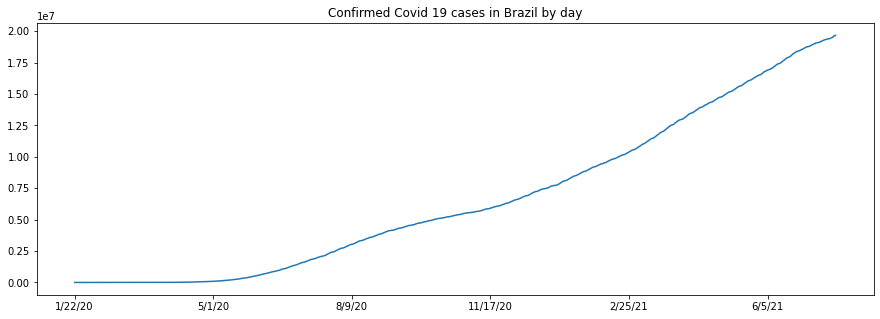

In [12]:
plt.figure(figsize = (15,5))
covid19_confirmed_group_country.loc['Brazil'][2:].plot()
plt.title('Confirmed Covid 19 cases in Brazil by day')
plt.show()

In [13]:
print('US has {} coonfirmed cases by Covid 19 in {}'.format(covid19_confirmed_group_country.loc['US'][2:].describe()[7],
                                                                day))

US has 34428050.0 coonfirmed cases by Covid 19 in 07/24/2021


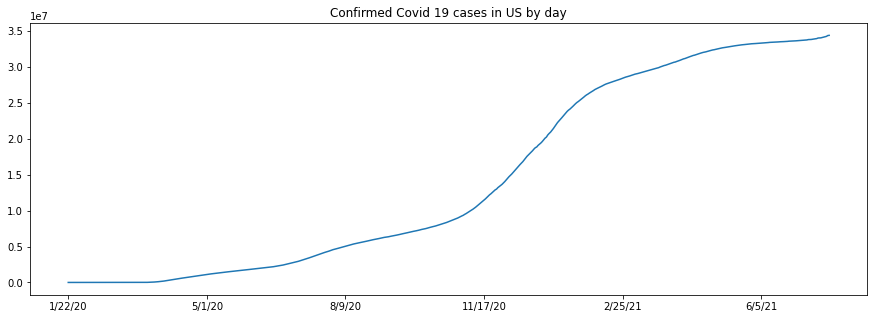

In [14]:
plt.figure(figsize = (15,5))
covid19_confirmed_group_country.loc['US'][2:].plot()
plt.title('Confirmed Covid 19 cases in US by day')
plt.show()

In [15]:
new_br = covid19_confirmed_group_country.loc['Brazil'][2:].diff().iloc[-1]
print('Brazil has {} new cases by Covid 19 in {}'.format(new_br,day))

Brazil has 38091.0 new cases by Covid 19 in 07/24/2021


<AxesSubplot:>

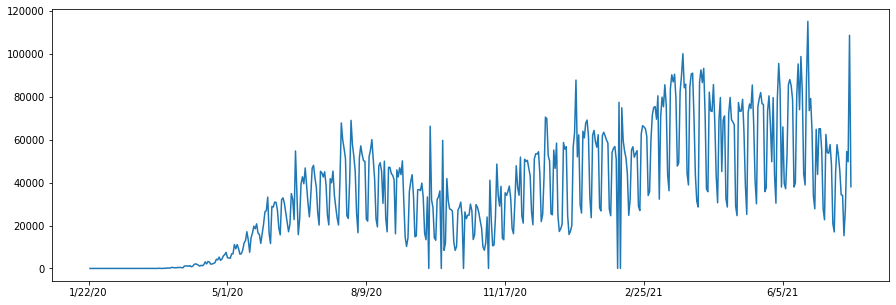

In [16]:
new_cases_brazil = covid19_confirmed_group_country.loc['Brazil'][2:].diff()
plt.figure(figsize = (15,5))
new_cases_brazil.plot()

In [17]:
new_us = covid19_confirmed_group_country.loc['US'][2:].diff().iloc[-1]
print('US has {} new cases by Covid 19 in {}'.format(new_us,day))

US has 27395.0 new cases by Covid 19 in 07/24/2021


In [18]:
def percentage(new_cases_difference):
    cases = float(new_cases_difference)
    if cases > 100:
        percent = cases-100
        count= str('less new cases than')
    else:
        percent = cases
        count= str('more new cases than')
    return percent,count

In [19]:
new_cases_difference = float(round((new_us*100)/new_br,2))
return_percentage = percentage(new_cases_difference)
print('Brazil has {}% {} US in'.format(return_percentage[0],return_percentage[1],day))

Brazil has 71.92% more new cases than US in


In [20]:
yesterday_120 = date.today() - timedelta(days=120)
day_120 = yesterday_120.strftime("%m/%d/%Y")
day_120 

'03/27/2021'

In [21]:
new_br = covid19_confirmed_group_country.loc['Brazil'][2:].diff().iloc[-120]
print('Brazil has {} new cases by Covid 19 in {}'.format(new_br,day_120))

Brazil has 85948.0 new cases by Covid 19 in 03/27/2021


In [22]:
new_us = covid19_confirmed_group_country.loc['US'][2:].diff().iloc[-120]
print('US has {} new cases by Covid 19 in {}'.format(new_us,day_120))

US has 62842.0 new cases by Covid 19 in 03/27/2021


In [23]:
new_cases_difference = float(round((new_us*100)/new_br,2))
return_percentage = percentage(new_cases_difference)
print('Brazil has {}% {} US in {}'.format(round(return_percentage[0],2),return_percentage[1],day_120))

Brazil has 73.12% more new cases than US in 03/27/2021


In [24]:
print('US has {} new cases by Covid 19 in {}'.format(new_us,day))

US has 62842.0 new cases by Covid 19 in 07/24/2021


<AxesSubplot:>

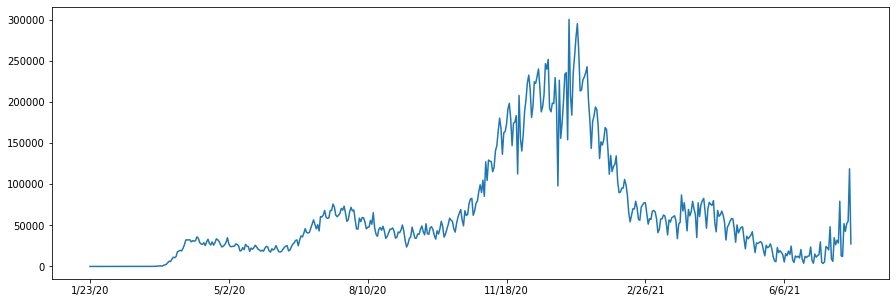

In [25]:
new_cases_us = covid19_confirmed_group_country.loc['US'][2:].diff().dropna()
plt.figure(figsize = (15,5))
new_cases_us.plot()

In [26]:
new_cases_us.describe()

count       549.000000
mean      62710.471767
std       62999.098732
min           0.000000
25%       22739.000000
50%       44251.000000
75%       70139.000000
max      300462.000000
Name: US, dtype: float64

In [27]:
last_date = '6/26/21'

<AxesSubplot:xlabel='Country/Region'>

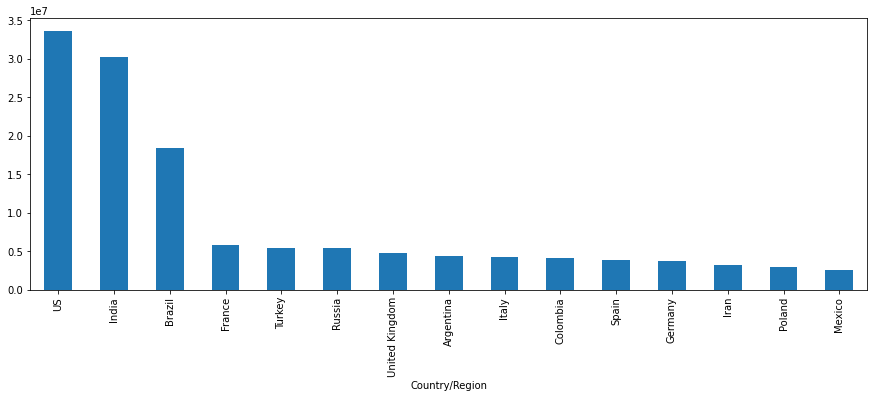

In [28]:
plt.figure(figsize = (15,5))
covid19_confirmed_group_country[last_date].sort_values(ascending = False)[0:15].plot(kind = 'bar')

# TREATMENT AND ANALYSIS OF DEATHS DATABASE

In [29]:
last_date_deaths = '6/26/21'

In [30]:
deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/15/21,7/16/21,7/17/21,7/18/21,7/19/21,7/20/21,7/21/21,7/22/21,7/23/21,7/24/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,5983,5983,5983,5983,6213,6266,6266,6325,6357,6357
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,3895,3910,3922,3938,3956,3979,3994,4008,4026,4042
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,127,127,127,127,127,127,127,127,127,127
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,951,952,954,957,969,970,973,977,977,982


In [31]:
print('The Dataset has {} lines and {} columns'.format(deaths.shape[0],deaths.shape[1]))

The Dataset has 279 lines and 554 columns


In [32]:
deaths_group_countries = deaths.groupby('Country/Region').sum()

In [33]:
print('Brazil has {} deaths by Covid 19 in {}'.format(deaths_group_countries.loc['Brazil'][2:].describe()[7],day))

Brazil has 549448.0 deaths by Covid 19 in 07/24/2021


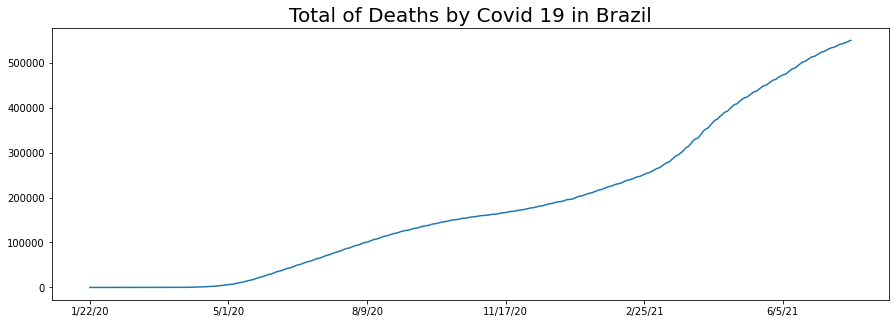

In [34]:
plt.figure(figsize=(15,5))
deaths_group_countries.loc['Brazil'][2:].plot()
plt.title('Total of Deaths by Covid 19 in Brazil',fontsize=20)
plt.show()

<AxesSubplot:xlabel='Country/Region'>

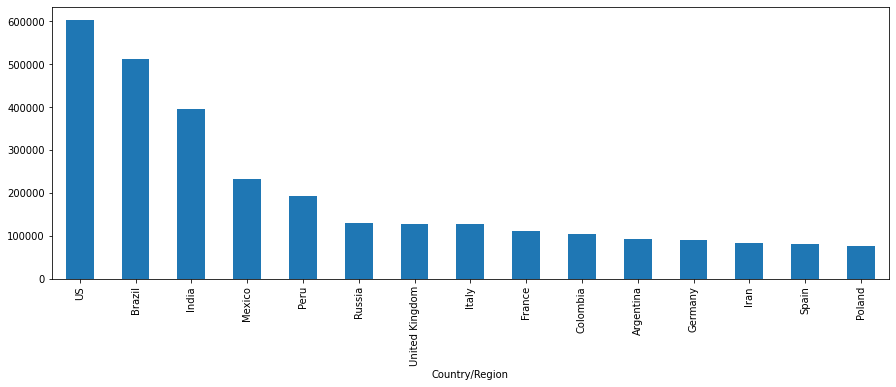

In [35]:
plt.figure(figsize=(15,5))
deaths_group_countries[last_date_deaths][2:].sort_values(ascending = False)[0:15].plot(kind = 'bar')

### Brazil

In [36]:
total_confirmed = float(covid19_confirmed_group_country.loc['Brazil'][2:].describe()[7])
total_deaths = float(deaths_group_countries.loc['Brazil'][2:].describe()[7])

In [37]:
total_deaths_percentage_br = (total_deaths * 100)/total_confirmed
print('The total deaths in percentage by the total cases confirmed in Brazil is: {0:.2f}%'.format(total_deaths_percentage_br))

The total deaths in percentage by the total cases confirmed in Brazil is: 2.79%


### US

In [38]:
total_confirmed = float(covid19_confirmed_group_country.loc['US'][2:].describe()[7])
total_deaths = float(deaths_group_countries.loc['US'][2:].describe()[7])

In [39]:
total_deaths_percentage_us = (total_deaths * 100)/total_confirmed
print('The total deaths in percentage by the total cases confirmed in US is: {0:.2f}%'.format(total_deaths_percentage_us))

The total deaths in percentage by the total cases confirmed in US is: 1.77%


### Italy

In [40]:
total_confirmed = float(covid19_confirmed_group_country.loc['Italy'][2:].describe()[7])
total_deaths = float(deaths_group_countries.loc['Italy'][2:].describe()[7])

In [41]:
total_deaths_percentage_italy = (total_deaths * 100)/total_confirmed
print('The total deaths in percentage by the total cases confirmed in Italy is: {0:.2f}%'.format(total_deaths_percentage_italy))

The total deaths in percentage by the total cases confirmed in Italy is: 2.97%


### Argentina

In [42]:
total_confirmed = float(covid19_confirmed_group_country.loc['Argentina'][2:].describe()[7])
total_deaths = float(deaths_group_countries.loc['Argentina'][2:].describe()[7])

In [43]:
total_deaths_percentage_ar = (total_deaths * 100)/total_confirmed
print('The total deaths in percentage by the total cases confirmed in Argentina is: {0:.2f}%'.format(total_deaths_percentage_ar))

The total deaths in percentage by the total cases confirmed in Argentina is: 2.14%


### Qatar

In [44]:
total_confirmed = float(covid19_confirmed_group_country.loc['Qatar'][2:].describe()[7])
total_deaths = float(deaths_group_countries.loc['Qatar'][2:].describe()[7])

In [45]:
total_deaths_percentage_qa = (total_deaths * 100)/total_confirmed
print('The total deaths in percentage by the total cases confirmed in Qatar is: {0:.2f}%'.format(total_deaths_percentage_qa))

The total deaths in percentage by the total cases confirmed in Qatar is: 0.27%


## India

In [46]:
total_confirmed = float(covid19_confirmed_group_country.loc['India'][2:].describe()[7])
total_deaths = float(deaths_group_countries.loc['India'][2:].describe()[7])

In [47]:
total_deaths_percentage_in = (total_deaths * 100)/total_confirmed
print('The total deaths in percentage by the total cases confirmed in India is: {0:.2f}%'.format(total_deaths_percentage_in))

The total deaths in percentage by the total cases confirmed in India is: 1.34%


<p>Now we'll check the mortality by this 5 countries</p>
<p>First let's create a dataframe with the datas that we created before</p>

In [48]:
countries = ['Brazil','US','Italy','Argentina','Qatar','India']
data = {'Countries':countries,
        'Percentage deaths':[round(total_deaths_percentage_br,2),
                             round(total_deaths_percentage_us,2),
                             round(total_deaths_percentage_italy,2),
                             round(total_deaths_percentage_ar,2),
                             round(total_deaths_percentage_qa,2),
                             round(total_deaths_percentage_in,2)],}
percentage_df = pd.DataFrame(data).sort_values(by='Percentage deaths', ascending = False).reset_index(drop=True)
percentage_df

,Countries,Percentage deaths
0,Italy,2.97
1,Brazil,2.79
2,Argentina,2.14
3,US,1.77
4,India,1.34
5,Qatar,0.27


<p> Now that we have a dataset we can see the information in a graphic

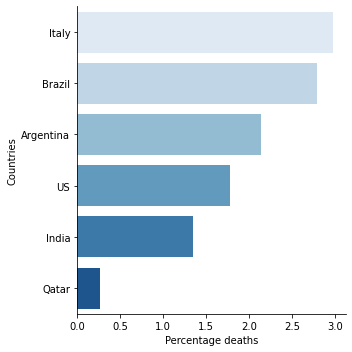

In [49]:
g = sns.catplot(x="Percentage deaths", 
            y='Countries', 
            kind="bar", 
            data=percentage_df,
            palette=sns.color_palette('Blues'))
plt.show()

<p> Seeing just the letality percentage we can imagine that even US having one of the worst cenary in this pandemic, maybe they have one of the most better health system. </p>

In [50]:
print('Qatar has {} cases confirmed and {} deaths in {}'.format(covid19_confirmed_group_country.loc['Qatar'][2:].describe()[7],
                                                               deaths_group_countries.loc['Qatar'][2:].describe()[7],
                                                               day))

Qatar has 225072.0 cases confirmed and 600.0 deaths in 07/24/2021


# TREATMENT AND ANALYSIS OF RECOVERED DATABASE

In [51]:
recovered.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/15/21,7/16/21,7/17/21,7/18/21,7/19/21,7/20/21,7/21/21,7/22/21,7/23/21,7/24/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,82586,82586,82586,82586,82586,82586,82586,82586,82586,82586
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,130061,130067,130072,130074,130081,130086,130097,130109,130118,130125
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,103809,104397,104992,105604,106337,107041,107776,108537,109349,109951
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,13829,13844,13844,13844,13897,13930,13930,13988,13988,13988
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,34620,34724,34732,34755,34790,34857,34893,35082,35082,35423


In [52]:
recovered_group_countries = recovered.groupby('Country/Region').sum()

In [53]:
print('Brasil has {} recovered in {}'.format(recovered_group_countries.loc['Brazil'].describe()[7],day))

Brasil has 17656625.0 recovered in 07/24/2021


In [54]:
print('US has {} recovered in {}'.format(recovered_group_countries.loc['US'].describe()[7],day))

US has 6298082.0 recovered in 07/24/2021


<p> US are not in the list, maybe they do not sent to the database the numbers of Recovered</p>

<AxesSubplot:xlabel='Country/Region'>

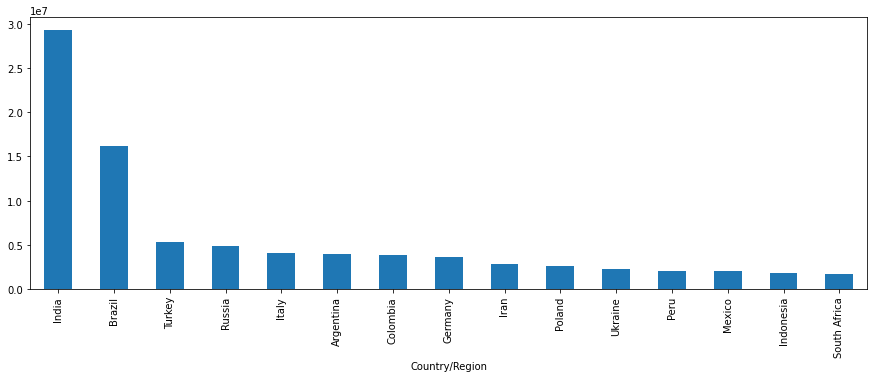

In [55]:
plt.figure(figsize=(15,5))
recovered_group_countries[last_date_deaths][2:].sort_values(ascending = False)[:15].plot(kind = 'bar')

# CREATING JUST ONE DS

In [56]:
def last_day_by_country (data):
    return data.groupby('Country/Region').sum().iloc[:,-1]

In [57]:
list_of_data = [last_day_by_country(confirmed),last_day_by_country(deaths),last_day_by_country(recovered)]

In [58]:
df_complete = pd.concat(list_of_data,axis=1)
df_complete.columns=['Confirmed','Deaths','Recovered']
df_complete

,Confirmed,Deaths,Recovered
Country/Region,,,
Afghanistan,143439,6357,82586
Albania,132853,2456,130125
Algeria,160868,4042,109951
Andorra,14498,127,13988
Angola,41736,982,35423
...,...,...,...
Vietnam,94913,370,17583
West Bank and Gaza,315968,3596,311380
Yemen,7008,1373,4166


In [59]:
df_complete['Letality_rate'] = round((df_complete['Deaths']*100)/df_complete['Confirmed'],2)
df_complete.sort_values(by='Letality_rate',ascending = False, inplace = True)

In [60]:
df_complete_r = df_complete.reset_index()

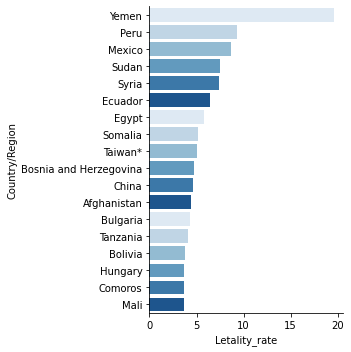

In [61]:
g = sns.catplot(x='Letality_rate',
                y='Country/Region', 
                kind="bar",
                data=df_complete_r[:20].query('Confirmed > 200'),
                palette=sns.color_palette('Blues'),)
plt.show()

In [62]:
df_complete_r.query('Confirmed >200')

,Country/Region,Confirmed,Deaths,Recovered,Letality_rate
2,Yemen,7008,1373,4166,19.59
3,Peru,2094445,195243,2060255,9.32
4,Mexico,2741983,238316,2140327,8.69
5,Sudan,37138,2776,30647,7.47
6,Syria,25865,1905,21942,7.37
...,...,...,...,...,...
182,Burundi,6128,8,773,0.13
183,Laos,4620,5,2174,0.11
184,Bhutan,2482,2,2222,0.08
185,Singapore,64054,37,62595,0.06


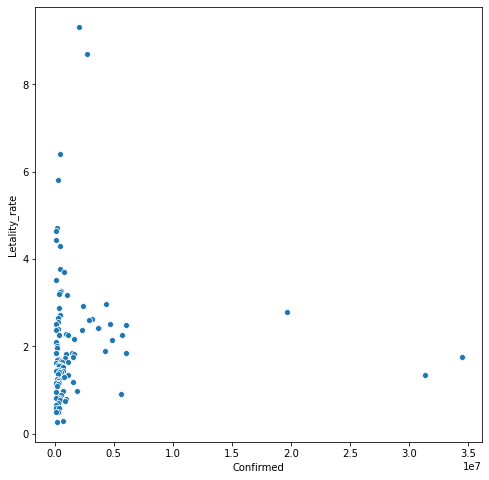

In [63]:
plt.figure(figsize=(8, 8))
s = sns.scatterplot(x='Confirmed',
                    y='Letality_rate', 
                    data=df_complete_r.query('Confirmed > 100000'))
plt.show()

In [64]:
df_complete.loc['Brazil']

Confirmed        19670534.00
Deaths             549448.00
Recovered        17656625.00
Letality_rate           2.79
Name: Brazil, dtype: float64

In [65]:
df_complete.loc['India']

Confirmed        31371901.00
Deaths             420551.00
Recovered        30543138.00
Letality_rate           1.34
Name: India, dtype: float64

In [66]:
df_complete.sort_values(by='Deaths',ascending = False)

,Confirmed,Deaths,Recovered,Letality_rate
Country/Region,,,,
US,34428050,610835,0,1.77
Brazil,19670534,549448,17656625,2.79
India,31371901,420551,30543138,1.34
Mexico,2741983,238316,2140327,8.69
Peru,2094445,195243,2060255,9.32
...,...,...,...,...
Samoa,3,0,3,0.00
Holy See,27,0,27,0.00
Micronesia,1,0,1,0.00


# Part II

In [67]:
confirmed_world = confirmed

In [68]:
confirmed_world['World'] = 'World'

In [69]:
confirmed_world = confirmed_world.groupby('World').sum()

In [70]:
confirmed_world

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,7/15/21,7/16/21,7/17/21,7/18/21,7/19/21,7/20/21,7/21/21,7/22/21,7/23/21,7/24/21
World,,,,,,,,,,,,,,,,,,,,,
World,5624.55855,6232.527614,557,655,941,1433,2118,2927,5578,6167,...,188925889,189525838,189998474,190418368,190916061,191445502,192005075,192573994,193165622,193730907


In [71]:
print('In {} world has {} Covid 19 cases confirmed'.format(day,confirmed_world.loc['World'][2:].describe()[7]))

In 07/24/2021 world has 193730907.0 Covid 19 cases confirmed


<AxesSubplot:>

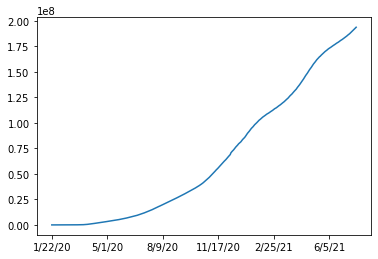

In [72]:
confirmed_world.loc['World'][2:].plot()

In [73]:
deaths_world = deaths
deaths_world['World'] = 'World'
deaths_world= deaths_world.groupby('World').sum()

In [74]:
print('In {} world has {} deaths by Covid 19'.format(day,deaths_world.loc['World'][2:].describe()[7]))

In 07/24/2021 world has 4152497.0 deaths by Covid 19


<AxesSubplot:>

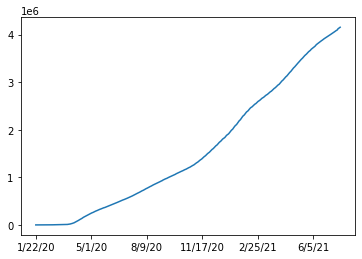

In [75]:
deaths_world.loc['World'][2:].plot()

In [76]:
deaths_covid = deaths_world.loc['World'][2:].describe()[7]
confirmed_covid = confirmed_world.loc['World'][2:].describe()[7]

In [77]:
letality_world = (deaths_covid*100)/confirmed_covid
letality_world

2.1434354818769314

In [78]:
print('The World letality of Covid 19 in {} is {}%'.format(day,round(letality_world,2)))

The World letality of Covid 19 in 07/24/2021 is 2.14%


In [79]:
deaths_br = float(deaths_group_countries.loc['Brazil'][2:].describe()[7])

In [80]:
total_deaths_br_world = round((deaths_br*100)/deaths_covid,2)

In [81]:
print('The deaths in Brazil represents {}% of total deaths in the world in {}'.format(total_deaths_br_world,day))

The deaths in Brazil represents 13.23% of total deaths in the world in 07/24/2021
